In [10]:
import sys
sys.path.append('../')

import numpy as np
from scipy import ndimage

from skimage.filters import sobel_h
from skimage.filters import sobel_v
from scipy import stats


import os
import matplotlib
import matplotlib.pyplot as plt
import scienceplots

from tensorflow.python.client import device_lib

plt.rcParams['figure.figsize'] = [10,10]

import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import decode_predictions
from tensorflow.keras.applications.resnet import ResNet50

from tensorflow.nn import depthwise_conv2d
from tensorflow.math import multiply, reduce_sum, reduce_mean,reduce_euclidean_norm, sin, cos, abs
from tensorflow import stack, concat, expand_dims

import tensorflow_probability as tfp

from utils.utils import *

plt.style.use(['science', 'ieee'])
plt.rcParams.update({'figure.dpi': '100'})

#### Experiment #1 : $\beta$ accross all layers (Top-10% filters)

In [2]:
model = ResNet50(weights='imagenet',
                  include_top=False,
                  input_shape=(224, 224, 3))

In [3]:
k = 10 # Top 20% highest l2-magnitude filters

In [1]:
conv_layers = []
for l in model.layers:
    if 'conv2d' in str(type(l)).lower():
        if l.kernel_size == (3,3):
            conv_layers.append(l)
e_beta = []
for l_num in range(1, len(conv_layers)):
    print(f" ============ LAYER {l_num} ==================")
    top10F=topKfilters(model, l_num, k=k)
    filters = get_filter(model, l_num)[:,:,:, top10F]
    print(filters.shape)
    s, a = getSymAntiSymTF(filters)

    a_energy = reduce_euclidean_norm(a, axis=[0,1])**2
    s_energy = reduce_euclidean_norm(s, axis=[0,1])**2
    total_energy  = reduce_euclidean_norm(filters, axis=[0,1])**2
    e_beta.append(np.mean(a_energy/total_energy))

    #print(np.mean(beta))

plt.plot(e_beta)

NameError: name 'model' is not defined

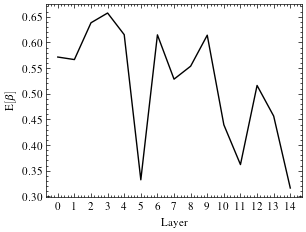

In [25]:
plt.plot(e_beta)
plt.xlabel("Layer")
plt.ylabel(r"$\text{E}[\beta]$")
plt.xticks(np.arange(0, len(conv_layers)-1, step=1))
plt.show()